# CCS Dataset

In [74]:
# Setup imports
import sklearn
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
def load_data() -> pd.DataFrame:
    """
    Load the data from the CSV file
    """
    np.random.seed()
    np.random.seed(np.random.randint(0, 500))
    
    df = pd.read_csv('ccs.csv')

    print("Columns:")
    print(df.dtypes)

    are_empty_values = df.isnull().values.any()
    print(f"Are there any empty values in the data? {are_empty_values}")

    # Make a shuffled 80:20 split

    # Shuffle the data
    df = df.sample(frac=1).reset_index(drop=True)

    # Split the data
    split = math.floor(len(df) * 0.8)
    train = df.iloc[:split]
    test = df.iloc[split:]

    print(f"Train size: {len(train)}")
    print(f"Test size: {len(test)}")

    # First 8 columns (until Age) are input features
    # The last (ccs) is the output feature

    X_train = train.iloc[:, :8]
    y_train = train.iloc[:, 8]
    X_test = test.iloc[:, :8].to_numpy()
    y_test = test.iloc[:, 8].to_numpy()

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = load_data()

Columns:
Cement (kg in a m^3 mixture)                        float64
Blast Furnace Slag (kg in a m^3 mixture)            float64
Fly Ash (kg in a m^3 mixture)                       float64
Water  (kg in a m^3 mixture)                        float64
Superplasticizer (kg in a m^3 mixture)              float64
Coarse Aggregate  (kg in a m^3 mixture)             float64
Fine Aggregate (kg in a m^3 mixture)                float64
Age (day)                                             int64
Concrete compressive strength(MPa, megapascals)     float64
dtype: object
Are there any empty values in the data? False
Train size: 824
Test size: 206


MSE: 101.23038339536583
R^2: 0.6251821420771851


/Users/berlm/Documents/projects/CS-3410/A1/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


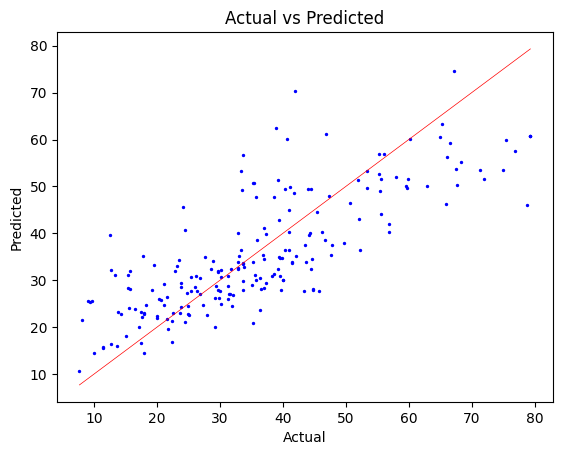

In [89]:
linear_regression = sklearn.linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

preds = linear_regression.predict(X_test)

mse_lr = 1 / len(X_test) * np.sum((y_test - preds) ** 2)

r2_lr = 1 - (np.sum((y_test - preds) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

print(f"MSE: {mse_lr}")
print(f"R^2: {r2_lr}")

x_axis = np.linspace(min(y_test), max(y_test), 100)

# Now we plot the predictions and the actual values
plt.scatter(y_test, preds, color='blue', s=2)
plt.plot(x_axis, x_axis, color='red', label='y=x', linewidth=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [78]:
# Now, we want to do this for multiple degrees of polynomial regression

degrees = [2, 3, 4]

models_data = {}

for i, degree in enumerate(degrees):
    model = sklearn.preprocessing.PolynomialFeatures(degree)
    X_train_p = model.fit_transform(X_train)
    X_test_p = model.fit_transform(X_test)

    lr = sklearn.linear_model.LinearRegression()
    lr.fit(X_train_p, y_train)
    models_data[degree] = {
        "data": X_test_p,
        "model": lr
    }

    preds = lr.predict(X_test_p)
    linespace = np.linspace(min(y_test), max(y_test), 100)

    mse = 1 / len(X_test) * np.sum((y_test - preds) ** 2)

    r2 = 1 - (
        np.sum((y_test - preds ** 2))
        / np.sum((y_test - np.mean(y_test)) ** 2)
    )

    print(f"[Degree {degree}] MSE: {mse}, R^2: {r2}")

[Degree 2] MSE: 53.20625603679078, R^2: 6.4553203116987765
[Degree 3] MSE: 64.24163285533349, R^2: 6.486790879545774
[Degree 4] MSE: 2990.941416138573, R^2: 17.767664609460276


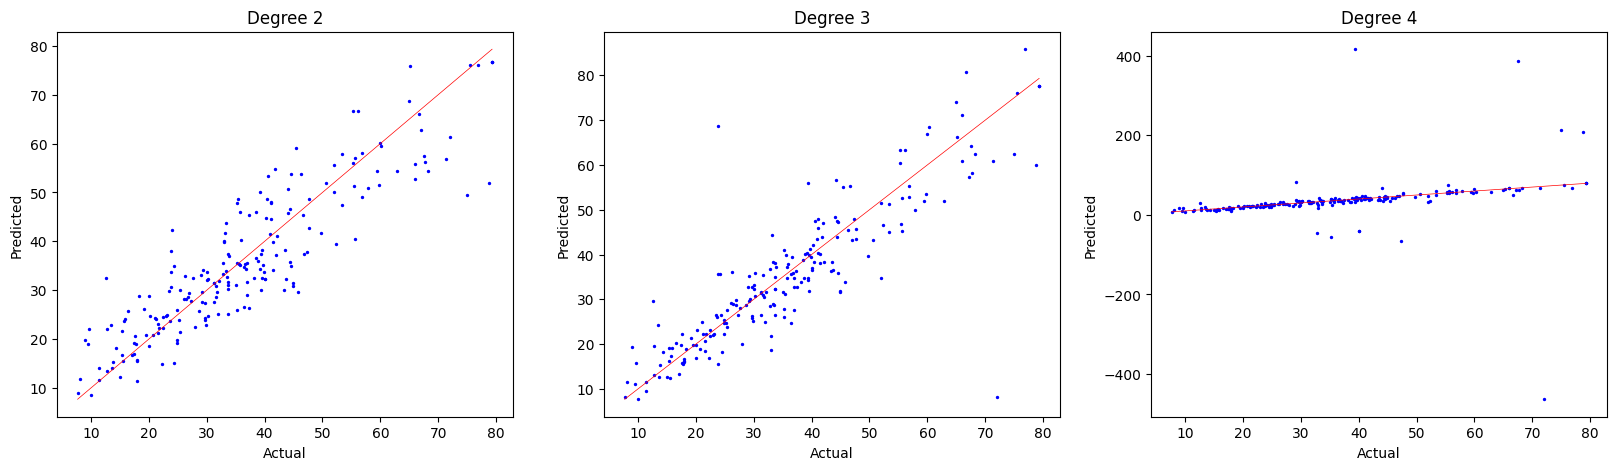

In [79]:
fig, axes = plt.subplots(1, len(degrees), figsize=(20, 5))
for i, degree in enumerate(degrees):
    model = models_data[degree]["model"]
    X_test_p = models_data[degree]["data"]
    preds = model.predict(X_test_p)
    axes[i].scatter(y_test, preds, color='blue', s=2)
    axes[i].plot(linespace, linespace, color='red', label='y=x', linewidth=0.5)
    axes[i].set_xlabel("Actual")
    axes[i].set_ylabel("Predicted")
    axes[i].set_title(f"Degree {degree}")

/Users/berlm/Documents/projects/CS-3410/A1/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


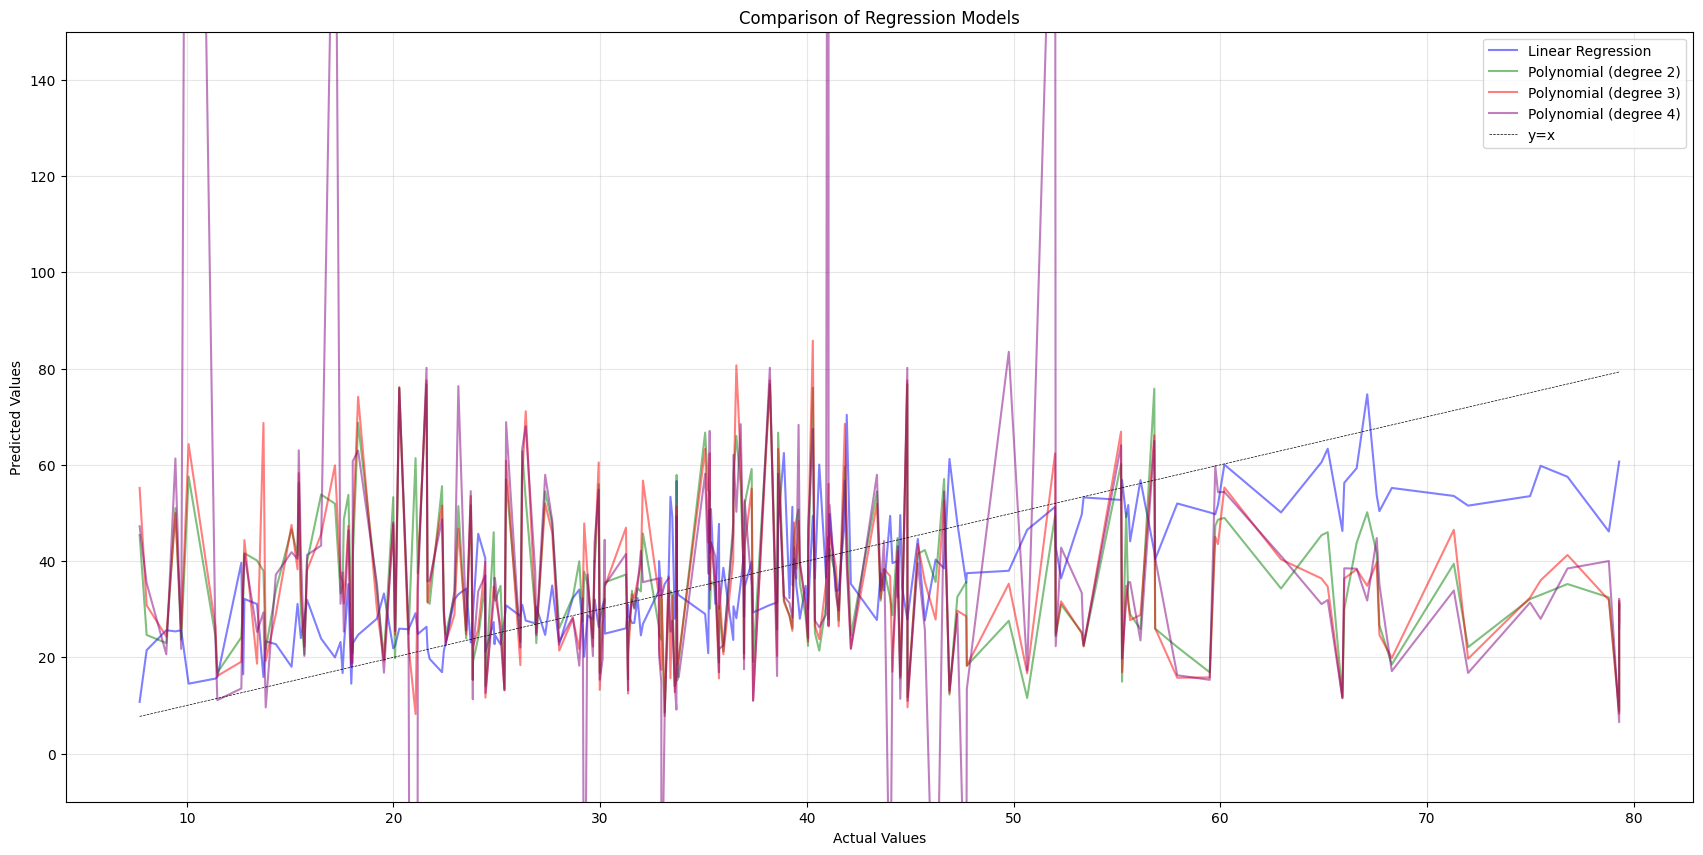

In [87]:
x_range = np.linspace(min(y_test), max(y_test), 100).reshape(-1, 1)

# Plot actual data points
plt.figure(figsize=(21, 10))

preds = linear_regression.predict(X_test)
sort_idx = np.argsort(y_test)

plt.plot(y_test[sort_idx], preds[sort_idx], color='blue', alpha=0.5, label='Linear Regression')

# Plot polynomial regression curves
colors = ['green', 'red', 'purple']
for i, degree in enumerate(degrees):
    model = models_data[degree]["model"]
    x_poly = models_data[degree]["data"]
    preds = model.predict(x_poly)
    plt.plot(y_test[sort_idx], preds, color=colors[i], alpha=0.5, label=f'Polynomial (degree {degree})')

# # Add reference line y=x
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         'k--', linewidth=0.5, label='y=x')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of Regression Models")
plt.legend()
plt.grid(True, alpha=0.3)
# Was added later to graph better
plt.ylim(-10, 150)
plt.show()

In [92]:
# Print RSE and R^2 for each model

print(f"Linear Regression RSE: {mse_lr}, R^2: {r2_lr}")

for degree in degrees:
    model = models_data[degree]["model"]
    X_test_p = models_data[degree]["data"]
    preds = model.predict(X_test_p)
    rse = np.sqrt(np.sum((y_test - preds) ** 2) / len(y_test))
    r2 = 1 - (np.sum((y_test - preds) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
    print(f"Polynomial (degree {degree}) RSE: {rse}, R^2: {r2}")

Linear Regression RSE: 101.23038339536583, R^2: 0.6251821420771851
Polynomial (degree 2) RSE: 7.294261856883861, R^2: 0.802997338872909
Polynomial (degree 3) RSE: 8.015087825802878, R^2: 0.7621375084369945
Polynomial (degree 4) RSE: 54.68950005383642, R^2: -10.074325880909493


### Part E - Analysis

1. The linear regression model has the highest bias, because it is simply fitting a line to the data. So, it makes the strongest assumptions about the data - that is is indeed linear. It also has the lowest variance, because it is not very sensitive to the data, as it cosniders all the data points when fitting the line. However, when looking at say the 4th degree polynomial, we can see that it is very sensitive to the data, since the same data point appears multiple times.

2. The 4th degree polynomial has the lowest bias, because it is not making any assumptions about the data. It also is very sensitive to the data, since the same data point appears multiple times.

3. A good model that achieves a balance is the 1st or 2nd degree polynomial. They have the lowest MSE and a good R^2 score. They are also not very sensitive to the data, since they are not overfitting to the data. However, the linear model (1st degree) does underfit the data, since it is not able to capture the non-linearity of the data.

4. Higher degree models tend to overfit due to the sheer number of features/parameters they get to fit. This means that instead of generalising, they reach a lower score by fitting the noise in the data. So, the 4th degree polynomial is the worst model, since it overfits the data.